# Javascript Snippets
---

### Removing duplicate strings in array

2 methods, although instantiating and spreading a set looks more elegant, the 2nd method performs roughly 8x slower

In [ ]:
//method 1, spreading a set
const uniqueArr = (arr) => [...new Set(arr)];

//method 2, for loop with map
const removeDuplicateStrings = (array) => {
    const uniqueValues = [];
    const seenMap = {};
  
    for (const item of array) {
      if (seenMap[item]) continue;
      seenMap[item] = true;
      uniqueValues.push(item);
    }
  
    return uniqueValues;
  };

### get parameters from URL and convert to object

In [ ]:
/**
 * Returns the provided URLs search parameters
 * as a set of key-value pairs.
 */
 const getURLParameters = (url) => {
    const { searchParams } = new URL(url);
    return Object.fromEntries(searchParams);
  };

In [ ]:
// also supports duplicate keys as array.

const getURLParams = (url) => {
  return (url.match(/([^?=&]+)(=([^&]*))/g) || []).reduce((acc, cur) => {
      const [k, v] = cur.split('=');
      const p = acc[k];

      acc[k] = p ? (Array.isArray(p) ? p : [p]).concat(v) : v;
      return acc;
  }, {});
};

// 🎉 {}
console.log(getURLParams('google.com'));

// 🎉 { name: '1', age: '2' }
console.log(getURLParams('https://www.google.com/?name=1&age=2'));

// Support duplicate key
// 🎉 { name: '1', age: [ '2', '3' ] }
console.log(getURLParams('https://www.google.com/?name=1&age=2&age=3'));

// 🎉 { name: '1', age: '2' }
console.log(getURLParams('name=1&age=2'));

### Get the values at a given path

In [ ]:
// gets the the value at given path
// of an object or array

const getValue = (from, selectors) =>
    selectors
        .replace(/\[([^[\]]*)]/g, '.$1.')
        .split('.')
        .filter((item) => item !== '')
        .reduce((acc, cur) => {
            if (acc instanceof Object) {
                return acc[cur];
            }
            return void 0;
        }, from);

const object = { a: [{ b: { c: 3 } }] };
const array = [{ a: { b: [1] } }, { c: 2 }];

// 3
console.log(getValue(object, 'a[0].b.c'));
// 1
console.log(getValue(array, '[0].a.b[0]'));
// 2
console.log(getValue(array, '[1].c'));
// undefined
console.log(getValue(array, '[0].a.b[0][2].c'));


### Check whether object is empty

In [ ]:
// may not check all cases, check prototype?
const isObjectEmpty = (object) => {
    if (object.constructor !== Object) return false;
    // Iterates over the keys of an object, if
    // any exist, return false.
    for (_ in object) return false;
    return true;
  };

### Resize or Empty an Array Using array.length

In [ ]:
let array = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'];

console.log(array.length); // returns the length as 10

array.length = 4;

console.log(array.length); // returns the length as 4
console.log(array); // returns ['a', 'b', 'c', 'd']

### Flatten the multidimensional array

In [ ]:
var entries = [1, [2, 5], [6, 7], 9];
var flat_entries = [].concat(...entries); 
// [1, 2, 5, 6, 7, 9]

### Getting the last item in the array

In [ ]:
var array = [1, 2, 3, 4, 5, 6]; 
console.log(array.slice(-1)); // [6] 
console.log(array.slice(-2)); // [5,6] 
console.log(array.slice(-3)); // [4,5,6]

### Swap two variables without a third variable

In [ ]:
let x = 1;
let y = 2;
[x, y] = [y, x]; // x = 2, y = 1

### Merging two arrays by optimizing memory

In [ ]:
var array1 = [1, 2, 3]; 
var array2 = [4, 5, 6]; 

var newSmallArray = array1.concat(array2); // concat uses a lot of memory
var newBigArray = array1.push.apply(array1, array2);

console.log(newArray); // [1,2,3,4,5,6]; 

### Instead of plain delete use splice

> splice is optimal bc delete just deletes the obj property 
> without reindexing or updating length leaving undefined values 
> and consumes a huge amount of time in execution

In [ ]:
Array = ["a", "b", "c", "d"] 
Array.splice(0, 2) ["a", "b"]

// Result: myArray ["c", "d"]

### Use a switch…case instead of if/else

> Switch…case and if/else performs almost the same task but the execution time 
> is faster bc if/else statement you need to compare on average 
> to get to the correct clause while switch statement basically 
> a lookup table that has options that are known.

### Copy content to the clipboard

In [ ]:
const copyToClipboard = (content) => {
  const textarea = document.createElement("textarea")
  
  textarea.value = content
  document.body.appendChild(textarea)
  textarea.select()
  document.execCommand("Copy")
  textarea.remove()
}

### Compare app versions

In [ ]:
const compareVersion = (version1, version2) => {
  const arr1 = version1.split(".")
  const arr2 = version2.split(".")
  const len1 = arr1.length
  const len2 = arr2.length
  const minLength = Math.min(len1, len2)
  
  for (let i = 0; i < minLength; i++) {
    let diff = parseInt(arr1[i], 10) - parseInt(arr2[i], 10)
    if (diff !== 0) return diff
  }
  return len1 < len2 ? -1 : len1 > len2 ? 1 : 0
}

const v1 = '2.0.1'
const v2 = '2.1.0'
const v3 = '2.1.0'

console.log(compareVersion(v1, v2)) // -1  V1 is less than V2
console.log(compareVersion(v2, v1)) // 1  V2 is greater than v1
console.log(compareVersion(v2, v3)) // 0  V2 equals V3

### Use URLSearchParams to get the search parameter of URL

In [ ]:
const getQueryByName = (name) => {
  const query = new URLSearchParams(location.search)
  return decodeURIComponent(query.get(name))
}
// url: https://medium.com/?name=fatfish&age=100
const name = getQueryByName('name') // fatfish
const age = getQueryByName('age') // 100
const gender = getQueryByName('gender') // null

### Scroll smoothly to the top of the page

In [ ]:
const scrollToTop = () => {
  const c = document.documentElement.scrollTop || document.body.scrollTop
  
  if (c > 0) {
    window.requestAnimationFrame(scrollToTop)
    window.scrollTo(0, c - c / 8)
  }
}

### Get the scroll distance of the current page

In [ ]:
const getScrollPosition = (el = window) => ({
  x: el.pageXOffset !== undefined ? el.pageXOffset : el.scrollLeft,
  y: el.pageYOffset !== undefined ? el.pageYOffset : el.scrollTop,
})

getScrollPosition() // { x: 0, y: 215 }

// Judge whether the current device is Andoird or iOS

In [ ]:
function getOSType() {
  let u = navigator.userAgent,
    app = navigator.appVersion
  let isAndroid = u.indexOf("Android") > -1 || u.indexOf("Linux") > -1
  let isIOS = !!u.match(/\(i[^]+( U)? CPU.+Mac OS X/)
  
  if (isIOS) {
    return 0
  } else if (isAndroid) {
    return 1
  } else {
    return 2
  }
}

getOSType() // 0

### Format Money 2 ways

In [ ]:
const formatMoney1 = (money) => {
  return money.replace(new RegExp(`(?!^)(?=(\\d{3})+${money.includes('.') ? '\\.' : '$'})`, 'g'), ',')  
}

formatMoney1('123456789') // '123,456,789'
formatMoney1('123456789.123') // '123,456,789.123'
formatMoney1('123') // '123'

const formatMoney2 = (money) => {
  return money.toLocaleString()
}

formatMoney2(123456789) // '123,456,789'
formatMoney2(123456789.123) // '123,456,789.123'
formatMoney2(123) // '123' 

### Enter and exit fullscreen

In [ ]:
// Enter full screen
function fullScreen() {
    let el = document.documentElement
    let rfs = el.requestFullScreen || el.webkitRequestFullScreen || el.mozRequestFullScreen || el.msRequestFullScreen
    //typeof rfs != "undefined" && rfs
    if (rfs) {
      rfs.call(el)
    } else if (typeof window.ActiveXObject !== "undefined") {
      let wscript = new ActiveXObject("WScript.Shell")
      if (wscript != null) {
        wscript.SendKeys("{F11}")
      }
    }
  }
  // Exit full screen
  function exitScreen() {
    let el = document
    let cfs = el.cancelFullScreen || el.webkitCancelFullScreen || el.mozCancelFullScreen || el.exitFullScreen
    //typeof cfs != "undefined" && cfs
    if (cfs) {
      cfs.call(el)
    } else if (typeof window.ActiveXObject !== "undefined") {
      let wscript = new ActiveXObject("WScript.Shell")
      if (wscript != null) {
        wscript.SendKeys("{F11}")
      }
    }
  }

### Pagination 
Suppose there are 120 articles in an array

In [ ]:
const articles = Array.from({ length: 120 }, (_, index) => index);

const paginate = (items, itemsPerPage = 10) => {
    const pages = Math.ceil(items.length / itemsPerPage);

    return Array.from({ length: pages }, (_, index) => {
        const start = index * itemsPerPage;
        return items.slice(start, start + itemsPerPage);
    });
};

console.log(paginate(articles));
console.log(paginate(articles, 7));

// full reference: https://web.dev/building-split-text-animations/

//* Text letters, words, lines, etc., cannot be individually animated with CSS or JS. 
//* To achieve the effect, we need boxes. If we want to animate each letter, 
//* then each letter needs to be an element. 
//* If we want to animate each word, then each word needs to be an element.



In [ ]:
const span = (text, index) => {
  const node = document.createElement('span')

  node.textContent = text
  node.style.setProperty('--index', index) // It's crucial to note that a 
  // custom property called --index is being set with the array position. 
  // use --index as a way of offsetting animations for a staggered look.

  return node
}

// Here's a sample of HTML that demonstrates the two attributes:
<div>
  <h1 split-by="letter" letter-animation="breath">animated letters</h1>
  <h1 split-by="word" word-animation="trampoline">hover the words</h1> 
</div>


export const makeSplits = (attr, how = 'letter') => {
  const byLetter = text =>
      [...text].map(span)

  const byWord = text =>
      text.split(' ').map(span)

  const splitTargets = document.querySelectorAll(`[${attr}]`)

  splitTargets.forEach(node => {
      // const type = node.getAttribute(`${attr}`)

      let nodes = null
      if (how === 'letter')
          nodes = byLetter(node.innerText)
      else if (how === 'word')
          nodes = byWord(node.innerText)

      if (nodes)
          node.firstChild.replaceWith(...nodes)
  })
}

---
### 20 Helpful JS one-liners

1) Find the max value in an array:

`Math.max(...array)`

2) Remove duplicates from an array:

`[...new Set(array)]`

3) Generate a random number between 1 and 100:

`Math.floor(Math.random() * 100) + 1`

4) Check if a string is a valid number:

`!isNaN(parseFloat(string))`

5) Get the current date and time:

`new Date().toString()`

6) Check if a variable is an array:

`Array.isArray(variable)`

7) Check if a variable is an object:

`typeof variable === "object"`

8) Convert an array to a string:

`array.join(",")`

9) Check if a variable is a function:

`typeof variable === "function"`

10) Convert an object to an array:

`Object.values(object)`

11) Count the occurrences of an element in an array:

`array.filter(x => x === element).length`

12) Create a new object with a dynamic key and value:

`{ [key]: value }`

13) Check if a string is a palindrome:

`string === string.split("").reverse().join("")`

14) Get the the sum of all the numbers in an array

`array.reduce((a, b) => a + b, 0));`

15) Get the current timestamp:

`Date.now()`

16) Check if a variable is null:

`variable === null`

17) Check if a variable is undefined:

`typeof variable === "undefined"`

18) Find the minimum value in an array

`Math.min(...array)`

19) Check if an array is empty:

`array.length === 0`

20) Create a new array with a specified range of numbers:

`Array.from({ length: n }, (_, i) => i)`

---
### Using Local Storage

In [ ]:
// utils.js
export const storage1 = {
  getItem(key, fallbackValue) {
    try {
      return localStorage.getItem(key);
    } catch(e) {
      return fallbackValue;
    }
  },
  setItem(key, value) {
    try {
      localStorage.setItem(key, value);
    } catch(e) {
      // 
    }
  },
  removeItem(key, value) {
    try {
      localStorage.removeItem(key, value);
    } catch(e) {
      // 
    }
  }
}

//* if LS not supported, fall back to memory class

function isSupportLS() {
  try {
    localStorage.setItem('_ranger-test-key', 'hi')
    localStorage.getItem('_ranger-test-key')
    localStorage.removeItem('_ranger-test-key')
    return true
  } catch (e) {
    return false
  }
}

class Memory {
  constructor() {
    this.cache = {}
  }
  setItem(cacheKey, data) {
    this.cache[cacheKey] = data
  }
  getItem(cacheKey) {
    return this.cache[cacheKey]
  }
  removeItem(cacheKey) {
    this.cache[cacheKey] = undefined
  }
}
// if not support localStorage, fallback to memory
export const storage2 = isSupportLS() ? window.localStorage : new Memory();


---
### Serialize Sequential Promises
https://gist.github.com/istarkov/a42b3bd1f2a9da393554

In [ ]:
// promise
const sleep = (timeout, v) => new Promise(r => setTimeout(() => r(v), timeout));
// series to call
const series = [() => sleep(1000, 1), () => sleep(1000, 2), () => sleep(1000, 3)];

// serialize
const r = series
  .reduce(
    (m, p) => m.then(v => Promise.all([...v, p()])),
    Promise.resolve([])
  );

// get result
r.then((r) => console.log('done', r))
// out [1, 2, 3]

### Async Serializer pattern
https://advancedweb.hu/how-to-serialize-calls-to-an-async-function/

The solution is to keep a queue of Promises that chains them one after the other. It is just a few lines of code and it is general purpose, allowing any function be serialized:

In [ ]:
const serialize = (fn) => {
	let queue = Promise.resolve();
	return (...args) => {
		const res = queue.then(() => fn(...args));
		queue = res.catch(() => {});
		return res;
	};
};

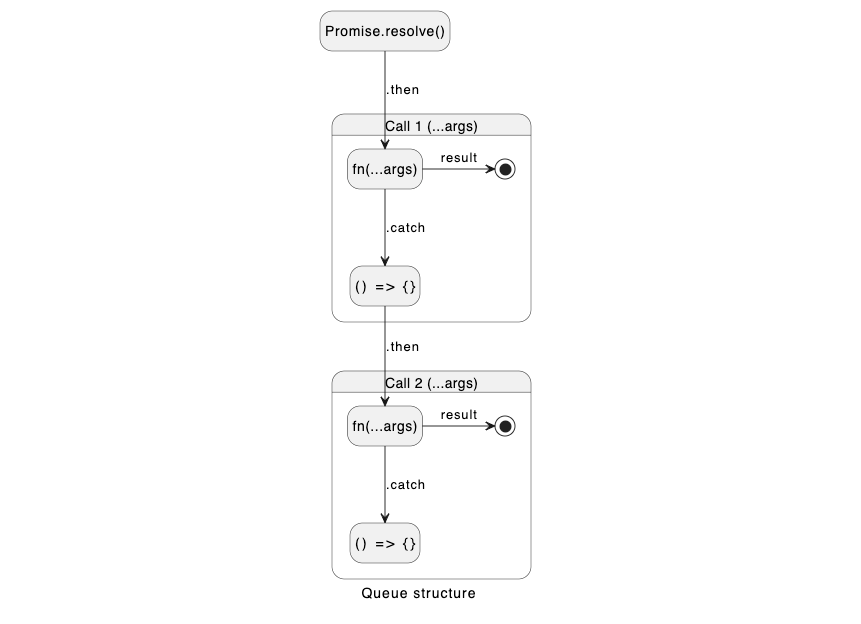

The `Promise.resolve()` is the start of the queue. Every other call is appended to this Promise.

The `queue.then(() => fn(...args))` adds the function call to the queue and it saves its result in res. It will be resolved when the current and all the previous calls are resolved.

The `queue = res.catch(() => {})` part makes sure that the queue won’t get stuck in rejection when one part of it is rejected.

Wrapping the caching function with this serializer makes sure that a single refresh is run even for multiple calls:

In [ ]:
const fn = serialize((() => {
	const cacheTime = 2000;
	let lastRefreshed = undefined;
	let lastResult = undefined;
	return async () => {
		const currentTime = new Date().getTime();
		// check if cache is fresh enough
		if (lastResult === undefined ||
			lastRefreshed + cacheTime < currentTime) {
			// refresh the value
			lastResult = await refresh();
			lastRefreshed = currentTime;
		}
		return lastResult;
	}
})());

fn();
fn();
// refreshing